In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime

# Importing the dataset

In [2]:
# Set the ticker symbol for Bank Nifty
ticker = "^NSEBANK"

# Download the data from Yahoo Finance for a specific date range
data = yf.download(ticker, start="2015-01-01", end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,18752.199219,19118.849609,18752.199219,19057.800781,19057.580078,0
2015-01-05,19155.199219,19166.000000,18987.699219,19017.400391,19017.179688,0
2015-01-06,18874.599609,18874.599609,18388.349609,18430.750000,18430.535156,0
2015-01-07,18382.550781,18482.050781,18211.500000,18304.250000,18304.037109,0
2015-01-08,18587.099609,18752.300781,18486.199219,18701.400391,18701.183594,0


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1784 entries, 2015-01-02 to 2023-05-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1784 non-null   float64
 1   High       1784 non-null   float64
 2   Low        1784 non-null   float64
 3   Close      1784 non-null   float64
 4   Adj Close  1784 non-null   float64
 5   Volume     1784 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 97.6 KB


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,18752.199219,19118.849609,18752.199219,19057.800781,19057.580078,0
2015-01-05,19155.199219,19166.000000,18987.699219,19017.400391,19017.179688,0
2015-01-06,18874.599609,18874.599609,18388.349609,18430.750000,18430.535156,0
2015-01-07,18382.550781,18482.050781,18211.500000,18304.250000,18304.037109,0
2015-01-08,18587.099609,18752.300781,18486.199219,18701.400391,18701.183594,0


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-08,42796.851562,43418.550781,42780.300781,43284.000000,43284.000000,223400
2023-05-09,43438.550781,43533.250000,43125.851562,43198.148438,43198.148438,229000
2023-05-10,43275.250000,43383.648438,42822.148438,43331.050781,43331.050781,249100
2023-05-11,43535.101562,43774.250000,43367.250000,43475.300781,43475.300781,190700
2023-05-12,43447.148438,43905.949219,43347.750000,43793.550781,43793.550781,0


In [7]:
data.shape

(1784, 6)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1.784000e+03
mean,28632.343304,28844.281754,28374.907866,28612.745558,28612.436794,1.272988e+06
std,7323.724956,7360.552503,7285.362734,7327.806454,7327.763235,4.297871e+07
min,13844.450195,13844.450195,13519.900391,13555.700195,13555.542969,0.000000e+00
25%,22972.062012,23165.812988,22733.762695,22959.863281,22959.595703,0.000000e+00
50%,27408.600586,27553.775391,27201.950195,27404.375000,27404.056641,0.000000e+00
75%,34955.300781,35222.837891,34652.886719,34949.924805,34949.518555,1.698000e+05
max,44078.601562,44151.800781,43987.949219,44049.101562,44048.589844,1.798102e+09


# Missing values

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt

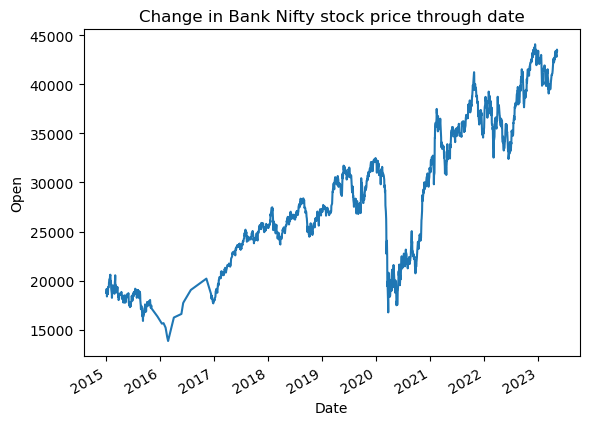

In [11]:

# plot price of gold for each increasing day
data["Open"].plot()
plt.title("Change in Bank Nifty stock price through date")
plt.xlabel("Date")
plt.ylabel("Open")
plt.show()

# Splitting X and Y into taining and testing varaibles

In [12]:
X=data[['Open','High','Low']]
y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape,X_test.shape


((1338, 3), (446, 3))

In [15]:
y_train.shape,y_test.shape

((1338,), (446,))

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[26751.96441406 17537.12175781 31952.34789062 30608.25542969
 31953.08583984 18161.68572266 35031.41179687 32231.86386719
 27415.58958984 25406.99525391 30571.89017578 17194.75591797
 26280.51324219 22676.53769531 17874.09417969 28335.22386719
 20623.72376953 18724.40865234 27348.97767578 24614.56732422
 26605.95701172 40567.90058594 18908.73869141 35021.3390625
 37778.25710938 27264.14744141 24717.09558594 42789.90335937
 26426.28794922 16397.62974609 38594.51761719 30612.31292969
 32644.64853516 25692.50501953 18970.35933594 25862.26902344
 39452.12785156 34530.57121094 19063.46732422 17648.55939453
 34848.99140625 40999.76125    25736.53679687 25868.81304687
 42898.83167969 39848.54765625 17504.45087891 34876.94640625
 31296.91150391 35981.74113281 32138.62810547 43303.45890625
 31385.62431641 26787.71177734 26208.39339844 22398.18683594
 27378.24761719 37190.45441406 25786.45509766 40271.5496875
 25260.87021484 32728.89255859 36084.92769531 38844.78199219
 25479.19671875 27232.1484

In [21]:
# R squared errorY
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9992035044589497


In [22]:
y_test=list(y_test)

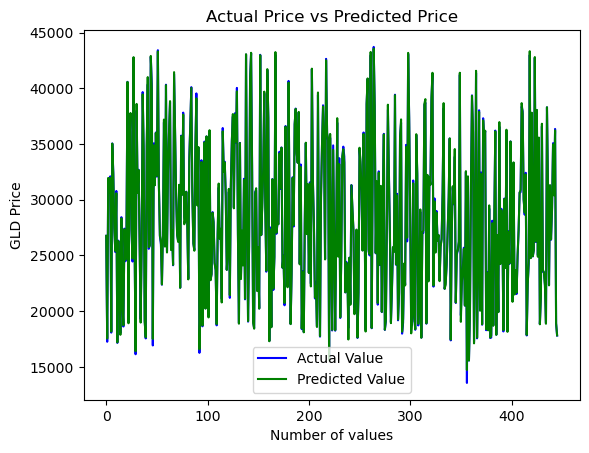

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Training the model using linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()


In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

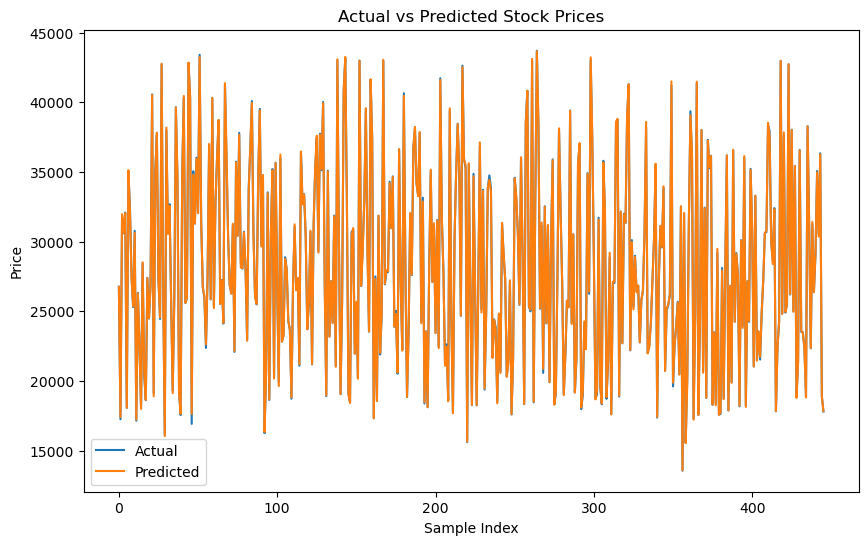

In [28]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [30]:
prediction=reg.predict(X)

In [31]:
prediction

array([19069.33930827, 19029.45520647, 18488.1814787 , ...,
       43012.94538287, 43611.87743746, 43769.7873528 ])

In [32]:
Open=float(input("enter a value"))
High=float(input("enter a value"))
Low=float(input("enter a value"))

data = np.array([[Open,High,Low]])
pred_value = model.predict(data)[0]

print(pred_value)

enter a value232
enter a value32423
enter a value23
28305.731296425598


C:\Users\reham\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle
file=open("model.pkl",'wb')
pickle.dump(model,file)